In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
titan_data = pd.read_csv('train.csv')

In [ ]:
titan_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

<ipython-input-64-92daed3058eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titan_data.corr(),cmap="PiYG")


<Axes: >

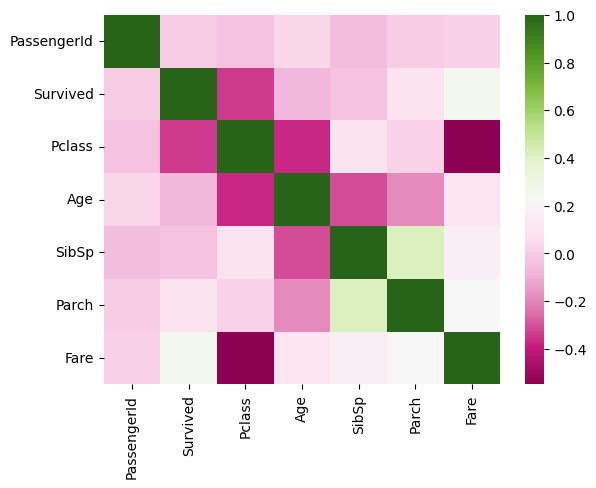

In [ ]:
import seaborn as sns
sns.heatmap(titan_data.corr(),cmap="PiYG")

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit (n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titan_data, titan_data[["Survived", "Pclass", "Sex"]]):
      strat_train_set= titan_data.loc[train_indices]
      strat_test_set= titan_data.loc[test_indices]

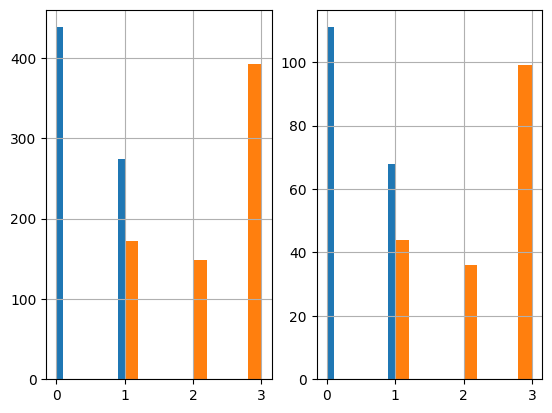

In [ ]:
plt.subplot (1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.subplot (1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

In [ ]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 765 to 128
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          143 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        48 non-null     object 
 11  Embarked     179 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


In [ ]:
titan_data.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
# # Encode Title and Embarked feature

# #combine = pd.get_dummies(titan_data, columns = ['Title'])
# combine = pd.get_dummies(titan_data, columns = ['Embarked'], prefix = 'Em')
# combine.head()


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
         def fit(self,X, y=None):
                 return self
         def transform(self, X):
                imputer=SimpleImputer (strategy="mean")
                X['Age'] =imputer.fit_transform (X[ ['Age']])
                return X

In [ ]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
        def fit (self, X, y=None):
                   return self
        def transform(self, X):
                   encoder = OneHotEncoder()
                   matrix = encoder.fit_transform(X[['Embarked']]).toarray()
                   column_names = ["C","S","Q","N"]
                   for i in range(len (matrix.T)):
                                 X[column_names[i]] = matrix.T[i]
                   matrix= encoder.fit_transform(X[['Sex']]).toarray()
                   column_names = ["Female","Male"]
                   for i in range(len(matrix.T)):
                      X[column_names[i]]= matrix.T[i]
                   return X

In [ ]:
class FeatureDropper (BaseEstimator, TransformerMixin):
                def fit (self, x, y=None):
                          return self
                def transform(self, X):
                          return X.drop([ "Embarked","Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [ ]:
from sklearn.pipeline import Pipeline
pipeline= Pipeline([("ageimputer", AgeImputer()),
                   ("featureencoder", FeatureEncoder()),
                    ("featuredropper", FeatureDropper())])

In [ ]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
743,744,0,3,24.000000,1,0,16.1000,0.0,0.0,1.0,0.0,1.0
328,329,1,3,31.000000,1,1,20.5250,0.0,0.0,1.0,1.0,0.0
526,527,1,2,50.000000,0,0,10.5000,0.0,0.0,1.0,1.0,0.0
214,215,0,3,29.783392,1,0,7.7500,0.0,1.0,0.0,0.0,1.0
879,880,1,1,56.000000,0,1,83.1583,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
614,615,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
815,816,0,1,29.783392,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
213,214,0,2,30.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
523,524,1,1,44.000000,0,1,57.9792,1.0,0.0,0.0,1.0,0.0


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 743 to 691
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

X=strat_train_set.drop(['Survived'], axis=1)
y=strat_train_set["Survived"]

scaler= StandardScaler()
x_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [ ]:
!pip install scikit-learn



In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [83]:
clf = RandomForestClassifier()
param_gird=[
{"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search= GridSearchCV(clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit (x_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [84]:
final_clf = grid_search.best_estimator_

In [85]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200)

In [86]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [89]:
from sklearn.preprocessing import StandardScaler


# Separate features (X) and target (y)
X_test = strat_test_set.drop(["Survived"], axis=1)
y_test = strat_test_set["Survived"]

# Create a StandardScaler object
scaler = StandardScaler()

# Apply standardization to the features (X) using fit_transform()
X_data_test = scaler.fit_transform(X_test)

# Convert target (y) to a NumPy array
y_data_test = y_test.to_numpy()


In [90]:
final_clf.score(X_data_test, y_data_test)

0.8268156424581006

In [91]:
final_data= pipeline.fit_transform(titan_data)

In [92]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [93]:
X_final= final_data.drop(['Survived'], axis=1)
y_final =final_data['Survived']
scaler=  StandardScaler ()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [94]:
prod_clf = RandomForestClassifier()
param_gird=[
{"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search= GridSearchCV(prod_clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit (X_data_final ,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [95]:
prod_final_clf =  grid_search.best_estimator_

In [96]:
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [97]:
titanic_test_data = pd.read_csv("test.csv")

In [99]:
final_test_data=pipeline.fit_transform (titanic_test_data)

In [100]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [102]:
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  C            418 non-null    float64
 12  S            418 non-null    float64
 13  Q            418 non-null    float64
 14  Female       418 non-null    float64
 15  Male         418 non-null    float64
dtypes: float64(7), int64(4), object(5)
memory usage: 52.4+ KB


In [107]:
X_final_test= final_test_data
X_final_test = X_final_test.fillna (method="ffill")
scaler= StandardScaler ()
X_data_final_test =scaler.fit_transform (X_final_test)

In [108]:
prediction = prod_final_clf.predict(X_data_final_test)

In [109]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [110]:

final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = prediction
final_df.to_csv("predictions.csv", index=False)

In [111]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
